In [3]:
# File name: Chamala_DSC530_Final_Project
# Author: Swetha Chamala
# Date: 02/29/2020
# Project: School safety report analysis of NYC schools

import numpy as np
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import thinkstats2

Importing csv files and checking number of rows and columns


In [4]:
ssr_df1 = pd.read_csv("/Users/swethach/Documents/DS530 Assignments/DSC530 Final Project/Chamala_DSC530_Final_Project/2010_-_2016_School_Safety_Report.csv")
ssr_df2 = pd.read_csv("/Users/swethach/Documents/DS530 Assignments/DSC530 Final Project/Chamala_DSC530_Final_Project/2016_-_2017_School_Safety_Report.csv")

print("Number of Rows in dataset 1: ", len(ssr_df1.axes[0]))
print("Number of Columns in dataset 1: ", len(ssr_df1.axes[1]))


print("\nNumber of Rows in dataset 2: ", len(ssr_df2.axes[0]))
print("Number of Columns in dataset 2: ", len(ssr_df2.axes[1]))



Number of Rows in dataset 1:  6310
Number of Columns in dataset 1:  34

Number of Rows in dataset 2:  2046
Number of Columns in dataset 2:  33


Cleaning data by deleting unwanted columns


In [5]:
ssr_df1 = ssr_df1.drop(['DBN', 'Address', 'Building Code', 'Location Name', 'Location Code', 'Building Name', 'Borough Name', 'Latitude', 'Longitude', 'Community Board', 'Council District ', 'Census Tract', 'BIN', 'BBL','NTA', 'Postcode'], axis=1)
ssr_df2 = ssr_df2.drop(['NYPD Site Code', 'NYPD Site Name', 'Location Name', 'Location Code', 'Building Name', 'Latitude', 'Longitude', 'Community Board', 'Council District', 'Geocode', 'Postcode', 'Census Tract', 'BIN', 'BBL','NTA'], axis=1)



Removing special characters in the column 'Register' of dataframe 1 - ssr_df1 
and converting data type from object to float. 



In [6]:
ssr_df1['Register'] = ssr_df1.Register.str.replace(',', '')
ssr_df1['Register'] = ssr_df1.Register.astype(float)



 Deleting rows with N/A values and resetting the indexes

In [7]:
ssr_df1 = ssr_df1.dropna()
ssr_df1.reset_index(drop=True, inplace=True)


print("\nNumber of Rows in cleaned dataset 1: ", len(ssr_df1.axes[0]))
print("Number of Columns in cleaned dataset 1: ", len(ssr_df1.axes[1]))

ssr_df2 = ssr_df2.dropna()
ssr_df2.reset_index(drop=True, inplace=True)


print("\nNumber of Rows in cleaned dataset 2: ", len(ssr_df2.axes[0]))
print("Number of Columns in cleaned dataset 2: ", len(ssr_df2.axes[1]))




Number of Rows in cleaned dataset 1:  3543
Number of Columns in cleaned dataset 1:  18

Number of Rows in cleaned dataset 2:  1207
Number of Columns in cleaned dataset 2:  18


Removing spaces and special characters in column headers



In [8]:
ssr_df1.columns = ssr_df1.columns.str.replace('# ', '')
ssr_df2.columns = ssr_df2.columns.str.replace('# ', '')


ssr_df1.columns = ssr_df1.columns.str.replace(' ', '_')
ssr_df2.columns = ssr_df2.columns.str.replace(' ', '_')



Printing a snapshot of both datasets 

In [9]:
print("\nSnapshot of dataset 1:\n", ssr_df1.head())
print("Snapshot of dataset 2:\n",ssr_df2.head())






Snapshot of dataset 1:
   School_Year Borough  Geographical_District_Code  Register  Schools  \
0     2013-14       K                        15.0    1277.0        1   
1     2013-14       K                        17.0     876.0        3   
2     2013-14       K                        13.0     513.0        1   
3     2013-14       K                        16.0     312.0        1   
4     2013-14       K                        17.0     714.0        1   

                                 Schools_in_Building  Major_N  Oth_N  \
0                                P.S. 001 The Bergen      0.0    2.0   
1  Parkside Preparatory Academy |  P.S. K141 |Exp...      1.0    5.0   
2                       P.S. 003 The Bedford Village      2.0    0.0   
3                         P.S. 005 Dr. Ronald Mcnair      1.0    1.0   
4                                           P.S. 006      0.0    1.0   

   NoCrim_N  Prop_N  Vio_N ENGroupA     RangeA  AvgOfMajor_N  AvgOfOth_N  \
0       1.0     1.0    0.0       

Printing datatypes of both datasets

In [10]:
print(ssr_df1.dtypes)
print(ssr_df2.dtypes)



School_Year                    object
Borough                        object
Geographical_District_Code    float64
Register                      float64
Schools                         int64
Schools_in_Building            object
Major_N                       float64
Oth_N                         float64
NoCrim_N                      float64
Prop_N                        float64
Vio_N                         float64
ENGroupA                       object
RangeA                         object
AvgOfMajor_N                  float64
AvgOfOth_N                    float64
AvgOfNoCrim_N                 float64
AvgOfProp_N                   float64
AvgOfVio_N                    float64
dtype: object
School_Year                    object
Borough                        object
Geographical_District_Code      int64
Register                      float64
Schools                         int64
Schools_in_Building            object
Major_N                       float64
Oth_N                         float6

Checking value counts of 'Borough' column of ssr_df1 to determine the distribution of schools based on the 5 boroughs in NYC. 

K = Brooklyn, Q = Queens, X= Bronx, M = Manhattan, R = Staten Island, O = Other

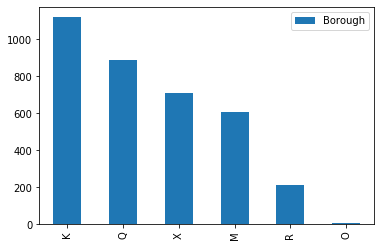

In [11]:
ssr_df1.Borough.value_counts().plot.bar(legend=True)



Checking value counts of 'Borough' column of ssr_df2 to determine the distribution of schools based on the 5 boroughs in NYC. 

K = Brooklyn, Q = Queens, X= Bronx, M = Manhattan, R = Staten Island, O = Other

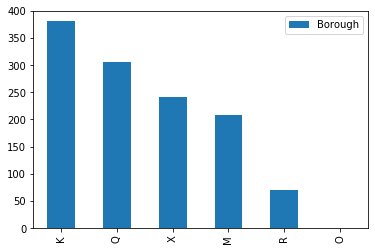

In [12]:
ssr_df2.Borough.value_counts().plot.bar(legend=True)

Plotting histograms of all the 'integer' columns in ssr_df1 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1e4a74d0>,
      dtype=object)

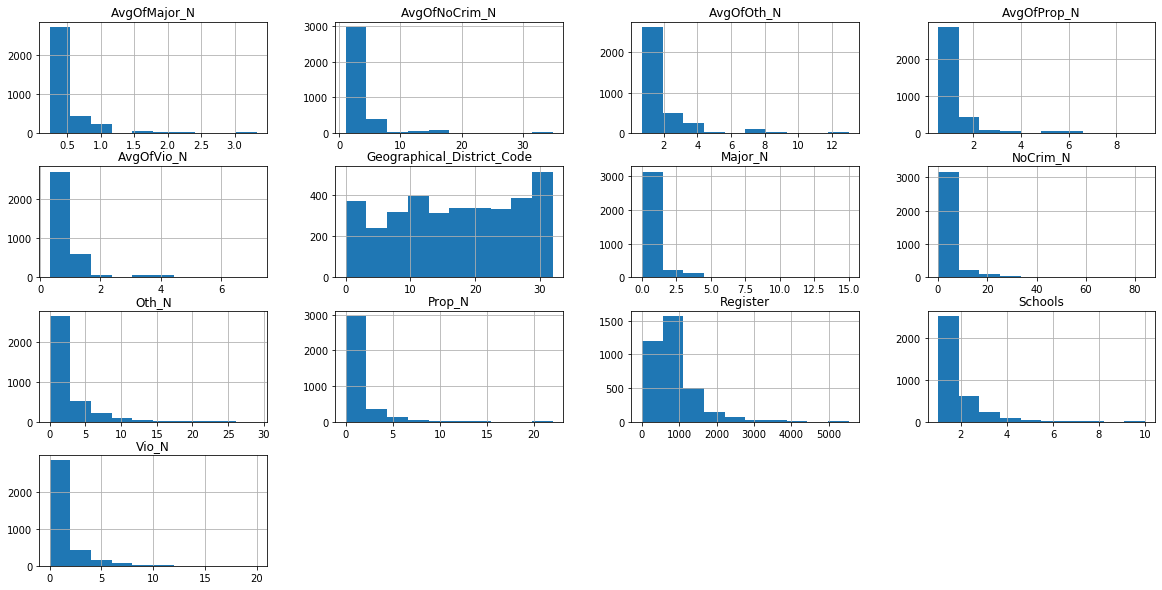

In [13]:
ssr_df1.hist(figsize=(20, 10))

The 5 variables - Major_N, NoCrim_N, Oth_N, Prop_N, Vio_N have similar distributions. Thereby same trend is observed in their corresponding 'Avg' distributions.

Plotting histograms of all the 'integer' columns in ssr_df2

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1edac790>,
      dtype=object)

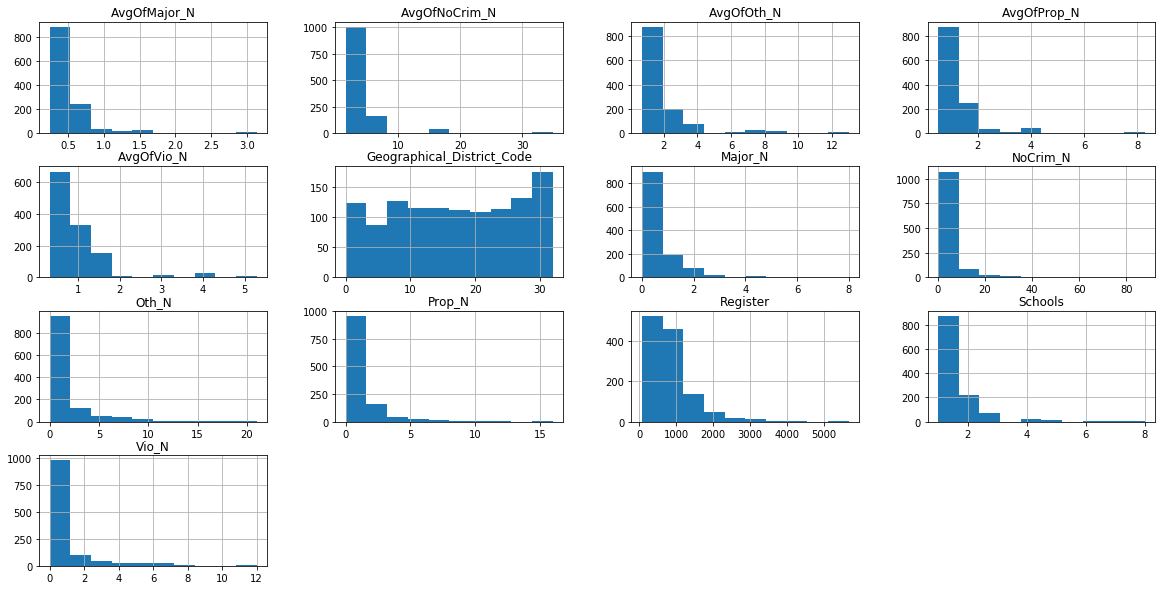

In [14]:
ssr_df2.hist(figsize=(20, 10))

Similar to dataset 1, the 2016-2017 dataset: ssr_df2 also shows the same trends.
The 5 variables - Major_N, NoCrim_N, Oth_N, Prop_N, Vio_N have similar distributions. Thereby same trend is observed in their corresponding 'Avg' distributions.

Calculating mean, min and max for dataset 1

In [15]:
ssr_df1.describe()

,Geographical_District_Code,Register,Schools,Major_N,Oth_N,NoCrim_N,Prop_N,Vio_N,AvgOfMajor_N,AvgOfOth_N,AvgOfNoCrim_N,AvgOfProp_N,AvgOfVio_N
count,3543.000000,3543.000000,3543.000000,3543.000000,3543.000000,3543.000000,3543.000000,3543.000000,3543.000000,3543.000000,3543.000000,3543.000000,3543.000000
mean,17.036410,852.122495,1.492803,0.500988,1.951454,3.313294,1.261078,0.894157,0.500641,1.939738,3.284045,1.256658,0.888191
std,9.462552,603.649524,1.008374,1.020920,3.154664,6.811536,2.068116,1.760290,0.416639,1.761559,4.086536,1.065912,0.804788
min,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.240000,0.710000,1.090000,0.510000,0.320000
25%,9.000000,487.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.310000,1.110000,1.710000,0.750000,0.500000
50%,17.000000,700.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.350000,1.320000,1.820000,0.830000,0.590000
75%,26.000000,1035.500000,2.000000,1.000000,3.000000,3.000000,2.000000,1.000000,0.520000,2.120000,3.560000,1.290000,1.000000
max,32.000000,5534.000000,10.000000,15.000000,29.000000,84.000000,22.000000,20.000000,3.330000,13.000000,34.860000,9.200000,7.170000


Calculating mean, min and max for dataset 2

In [16]:
ssr_df2.describe()

,Geographical_District_Code,Register,Schools,Major_N,Oth_N,NoCrim_N,Prop_N,Vio_N,AvgOfMajor_N,AvgOfOth_N,AvgOfNoCrim_N,AvgOfProp_N,AvgOfVio_N
count,1207.000000,1207.000000,1207.000000,1207.000000,1207.000000,1207.000000,1207.000000,1207.000000,1207.000000,1207.000000,1207.000000,1207.000000,1207.000000
mean,16.968517,856.323944,1.447390,0.413422,1.651201,3.573322,0.984258,0.863297,0.440563,1.856031,3.442883,1.133488,0.887481
std,9.485907,617.769270,0.913511,0.870896,2.741209,7.060698,1.691041,1.705139,0.354248,1.702996,4.112250,0.926291,0.771352
min,0.000000,74.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.240000,0.710000,1.670000,0.510000,0.320000
25%,9.000000,470.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.270000,0.900000,1.710000,0.630000,0.440000
50%,17.000000,695.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.280000,1.110000,1.740000,0.750000,0.530000
75%,26.000000,1046.000000,2.000000,1.000000,2.000000,4.000000,1.000000,1.000000,0.570000,2.120000,3.640000,1.390000,1.050000
max,32.000000,5682.000000,8.000000,8.000000,21.000000,88.000000,16.000000,12.000000,3.140000,13.000000,34.860000,8.290000,5.290000


Calculating mode for dataset 1

In [17]:
ssr_df1.mode()


,School_Year,Borough,Geographical_District_Code,Register,Schools,Schools_in_Building,Major_N,Oth_N,NoCrim_N,Prop_N,Vio_N,ENGroupA,RangeA,AvgOfMajor_N,AvgOfOth_N,AvgOfNoCrim_N,AvgOfProp_N,AvgOfVio_N
0,2014-15,K,2.0,504.0,1.0,P.S. 253,0.0,0.0,0.0,0.0,0.0,4C,501-750,0.27,1.11,1.76,0.83,0.75
1,2015-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Calculating mode for dataset 2

In [18]:
ssr_df2.mode()

,School_Year,Borough,Geographical_District_Code,Register,Schools,Schools_in_Building,Major_N,Oth_N,NoCrim_N,Prop_N,Vio_N,ENGroupA,RangeA,AvgOfMajor_N,AvgOfOth_N,AvgOfNoCrim_N,AvgOfProp_N,AvgOfVio_N
0,2016 - 17,K,2,508.0,1,P.S. 253,0.0,0.0,0.0,0.0,0.0,4C,501-750,0.28,1.11,1.74,0.75,0.53


Calculating variance for dataset 1

In [19]:
ssr_df1.var()


Geographical_District_Code        89.539894
Register                      364392.747837
Schools                            1.016817
Major_N                            1.042277
Oth_N                              9.951906
NoCrim_N                          46.397020
Prop_N                             4.277104
Vio_N                              3.098619
AvgOfMajor_N                       0.173588
AvgOfOth_N                         3.103091
AvgOfNoCrim_N                     16.699775
AvgOfProp_N                        1.136168
AvgOfVio_N                         0.647683
dtype: float64

Calculating variance for dataset 2

In [20]:
ssr_df2.var()

Geographical_District_Code        89.982424
Register                      381638.870927
Schools                            0.834502
Major_N                            0.758460
Oth_N                              7.514225
NoCrim_N                          49.853450
Prop_N                             2.859619
Vio_N                              2.907499
AvgOfMajor_N                       0.125492
AvgOfOth_N                         2.900195
AvgOfNoCrim_N                     16.910597
AvgOfProp_N                        0.858015
AvgOfVio_N                         0.594983
dtype: float64

Calculating min and max for dataset 1

In [21]:
ssr_df1.min(), ssr_df1.max()


(School_Year                                                             2013-14
 Borough                                                                       K
 Geographical_District_Code                                                    0
 Register                                                                      3
 Schools                                                                       1
 Schools_in_Building             Archer Elementary School |  PS 536 |  Bronx ...
 Major_N                                                                       0
 Oth_N                                                                         0
 NoCrim_N                                                                      0
 Prop_N                                                                        0
 Vio_N                                                                         0
 ENGroupA                                                                    10C
 RangeA                     

Calculating PMFs for all variables in dataset 1

In [104]:
MajorN_pmf = ssr_df1['Major_N'].value_counts(normalize=True)    
OthN_pmf = ssr_df1['Oth_N'].value_counts(normalize=True)                              
NoCrimN_pmf = ssr_df1['NoCrim_N'].value_counts(normalize=True)                          
PropN_pmf  = ssr_df1['Prop_N'].value_counts(normalize=True)                             
VioN_pmf = ssr_df1['Vio_N'].value_counts(normalize=True)  

pmfs = pd.concat([MajorN_pmf, OthN_pmf, NoCrimN_pmf, PropN_pmf, VioN_pmf], axis=1)

pmfs.head()


,Major_N,Oth_N,NoCrim_N,Prop_N,Vio_N
0.0,0.707028,0.441716,0.384702,0.494214,0.642958
1.0,0.177815,0.206605,0.210838,0.234547,0.160034
2.0,0.065199,0.100762,0.112899,0.108947,0.075642
3.0,0.027942,0.070279,0.060119,0.058990,0.044877
4.0,0.012419,0.041773,0.040644,0.038103,0.025684


Calculating PMFs for all variables in dataset 2

In [82]:
MajorN_pmf2 = ssr_df2['Major_N'].value_counts(normalize=True)    
OthN_pmf2 = ssr_df2['Oth_N'].value_counts(normalize=True)                              
NoCrimN_pmf2 = ssr_df2['NoCrim_N'].value_counts(normalize=True)                          
PropN_pmf2  = ssr_df2['Prop_N'].value_counts(normalize=True)                             
VioN_pmf2 = ssr_df2['Vio_N'].value_counts(normalize=True)  

pmfs2 = pd.concat([MajorN_pmf2, OthN_pmf2, NoCrimN_pmf2, PropN_pmf2, VioN_pmf2], axis=1)

pmfs2.head()

,Major_N,Oth_N,NoCrim_N,Prop_N,Vio_N
0.0,0.744822,0.478873,0.353770,0.549296,0.652030
1.0,0.156587,0.211268,0.202983,0.241094,0.157415
2.0,0.063795,0.096106,0.110191,0.091135,0.080365
3.0,0.019056,0.067937,0.063795,0.043082,0.033140
4.0,0.009942,0.034797,0.062966,0.030655,0.024027


Comparing PMFs for both datasets - they do not seem to be much different

Plotting CDFs for variables of Dataset 1

Text(0.5, 0, 'x')

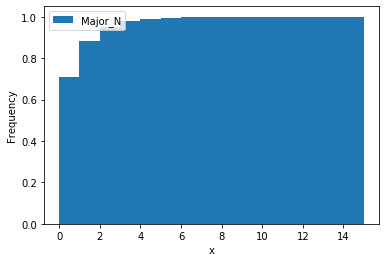

In [105]:
ssr_df1.plot(y='Major_N', kind='hist', bins=1000, cumulative=True, normed=True)
plt.xlabel('x')


Text(0.5, 0, 'x')

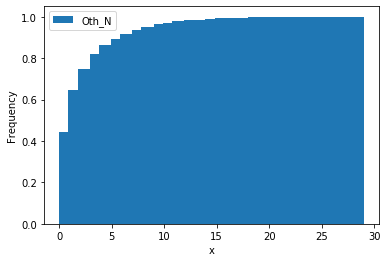

In [106]:
ssr_df1.plot(y='Oth_N', kind='hist', bins=100, cumulative=True, normed=True)
plt.xlabel('x')



Text(0.5, 0, 'x')

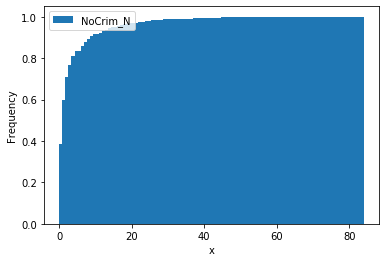

In [107]:
ssr_df1.plot(y='NoCrim_N', kind='hist', bins=100, cumulative=True, normed=True)
plt.xlabel('x')

Text(0.5, 0, 'x')

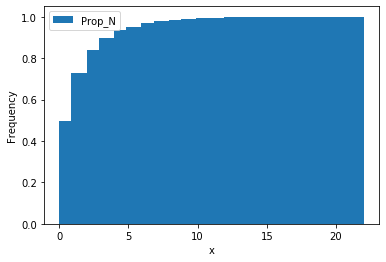

In [108]:
ssr_df1.plot(y='Prop_N', kind='hist', bins=100, cumulative=True, normed=True)
plt.xlabel('x')

Text(0.5, 0, 'x')

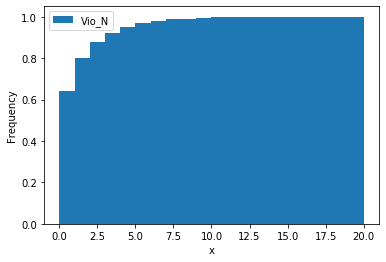

In [109]:
ssr_df1.plot(y='Vio_N', kind='hist', bins=100, cumulative=True, normed=True)
plt.xlabel('x')

Comparing k - Brooklyn borough and Q - Queens borough values for analytical distribution

In [110]:
k_borough = ssr_df1[ssr_df1['Borough']=='K']
q_borough = ssr_df1[ssr_df1['Borough']=='Q']

In [111]:
len(k_borough)

1120

In [112]:
len(q_borough)

890

In [113]:
k_series = k_borough['AvgOfMajor_N']

In [114]:
q_series = q_borough['AvgOfMajor_N']

In [115]:
k_series.head()

0    0.86
1    0.52
2    0.33
3    0.35
4    0.33
Name: AvgOfMajor_N, dtype: float64

In [116]:
q_series.head()

26     0.33
220    0.52
256    0.33
426    0.31
504    0.35
Name: AvgOfMajor_N, dtype: float64

Making a list

In [117]:
k_list = k_borough['AvgOfMajor_N'].tolist() 

In [118]:
q_list = q_borough['AvgOfMajor_N'].tolist()

Plotting PMFs of K and Q boroughs as an example of PMF plots shown in page 29 of Thinkstats book

In [120]:
import thinkstats2 
import thinkplot

k_pmf = thinkstats2.Pmf(k_list)

In [121]:
q_pmf = thinkstats2.Pmf(q_list)

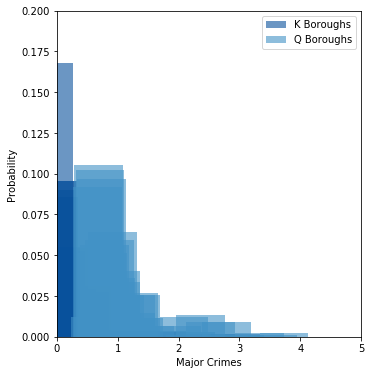

In [46]:
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(k_pmf, align='right', width=0.8, label = 'K Boroughs')
thinkplot.Hist(q_pmf, align='left', width=0.8, label = 'Q Boroughs')
thinkplot.Config(xlabel='Major Crimes',
                         ylabel='Probability',
                         axis=[0, 5, 0, 0.2])

Plotting CDFs of K and Q boroughs

In [122]:
cdf = thinkstats2.Cdf(k_pmf, label='kboroughs')

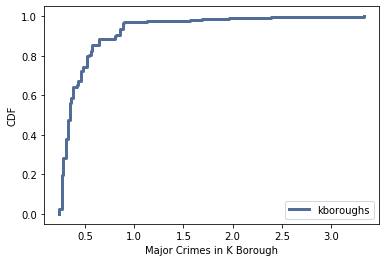

<Figure size 576x432 with 0 Axes>

In [123]:
thinkplot.Cdf(cdf)
thinkplot.Show(xlabel='Major Crimes in K Borough', ylabel='CDF')

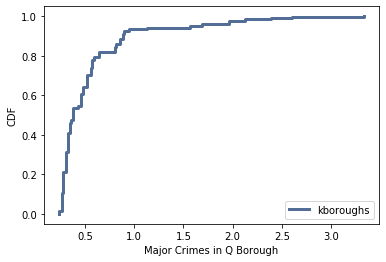

<Figure size 576x432 with 0 Axes>

In [124]:
cdf = thinkstats2.Cdf(q_pmf, label='kboroughs')
thinkplot.Cdf(cdf)
thinkplot.Show(xlabel='Major Crimes in Q Borough', ylabel='CDF')

Repeating the K and Q borough analysis for Dataset 2

In [128]:
q_borough_2017 = ssr_df2[ssr_df2['Borough']=='Q']
k_borough_2017 = ssr_df2[ssr_df2['Borough']=='K']

In [129]:
k_list_2017 = k_borough_2017['AvgOfMajor_N'].tolist() 
q_list_2017 = q_borough_2017['AvgOfMajor_N'].tolist()

In [130]:
k_pmf_2017 = thinkstats2.Pmf(k_list_2017)
q_pmf_2017 = thinkstats2.Pmf(q_list_2017)

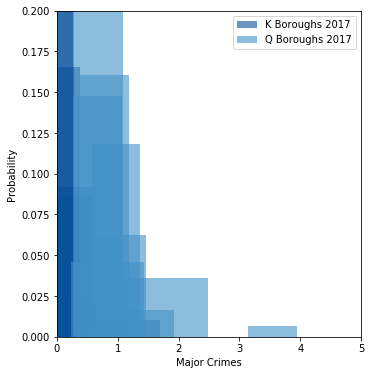

In [131]:
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(k_pmf_2017, align='right', width=0.8, label = 'K Boroughs 2017')
thinkplot.Hist(q_pmf_2017, align='left', width=0.8, label = 'Q Boroughs 2017')
thinkplot.Config(xlabel='Major Crimes',
                         ylabel='Probability',
                         axis=[0, 5, 0, 0.2])

Plotting PMFs of K boroughs of datasets 1 and 2 for comparision

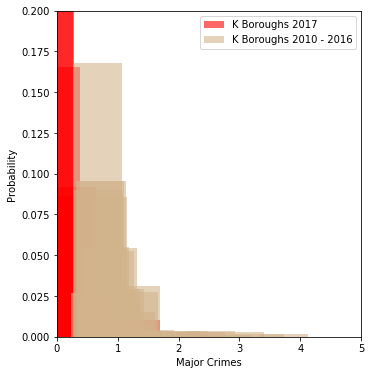

In [132]:
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(k_pmf_2017, align='right', width=0.8, label = 'K Boroughs 2017', color = 'red')
thinkplot.Hist(k_pmf, align='left', width=0.8, label = 'K Boroughs 2010 - 2016', color = 'tan')
thinkplot.Config(xlabel='Major Crimes',
                         ylabel='Probability',
                         axis=[0, 5, 0, 0.2])

It is evident that the 2017 has high probability of '0' cases reported for K borough compared to 2010-2016 dataset 

Plotting PMFs of Q boroughs of datasets 1 and 2 for comparision

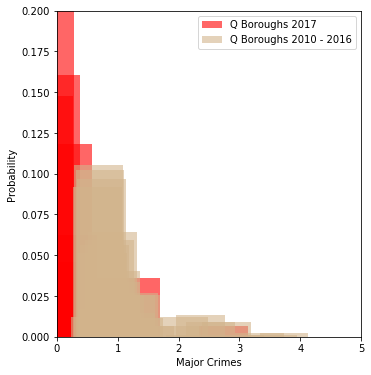

In [134]:
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(q_pmf_2017, align='right', width=0.8, label = 'Q Boroughs 2017', color = 'red')
thinkplot.Hist(q_pmf, align='left', width=0.8, label = 'Q Boroughs 2010 - 2016', color = 'tan')
thinkplot.Config(xlabel='Major Crimes',
                         ylabel='Probability',
                         axis=[0, 5, 0, 0.2])

It is evident that the 2017 has high probability of '0' cases reported for Q borough compared to 2010-2016 dataset 

Plotting CDFs of K and Q boroughs of dataset 1

In [138]:
cdf_2016 = thinkstats2.Cdf(k_pmf, label='k boroughs')

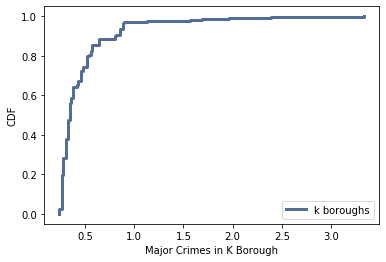

<Figure size 576x432 with 0 Axes>

In [139]:
thinkplot.Cdf(cdf_2016)
thinkplot.Show(xlabel='Major Crimes in K Borough', ylabel='CDF')

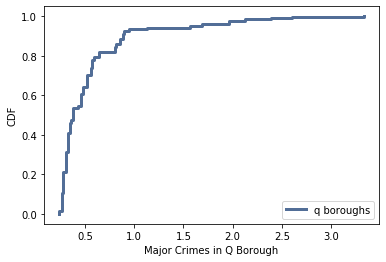

<Figure size 576x432 with 0 Axes>

In [140]:
cdf = thinkstats2.Cdf(q_pmf, label='q boroughs')
thinkplot.Cdf(cdf)
thinkplot.Show(xlabel='Major Crimes in Q Borough', ylabel='CDF')

Plotting CDFs of K and Q boroughs of dataset 2

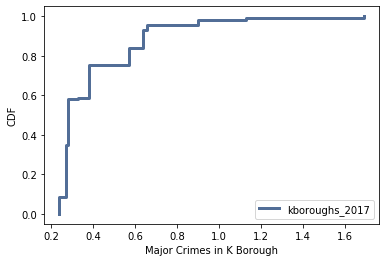

<Figure size 576x432 with 0 Axes>

In [58]:
cdf_2017 = thinkstats2.Cdf(k_pmf_2017, label='kboroughs_2017')
thinkplot.Cdf(cdf_2017)
thinkplot.Show(xlabel='Major Crimes in K Borough', ylabel='CDF')

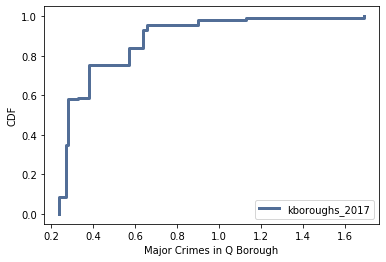

<Figure size 576x432 with 0 Axes>

In [141]:
cdf = thinkstats2.Cdf(q_pmf_2017, label='q boroughs 2017')
thinkplot.Cdf(cdf_2017)
thinkplot.Show(xlabel='Major Crimes in Q Borough', ylabel='CDF')

Comparing CDFs of dataset 1 and 2

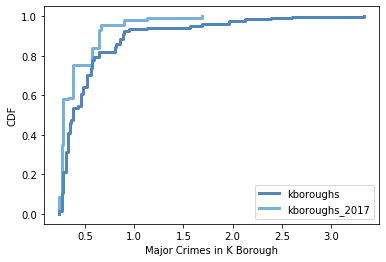

<Figure size 576x432 with 0 Axes>

In [59]:
thinkplot.PrePlot(2)
thinkplot.Cdfs([cdf, cdf_2017])
thinkplot.Show(xlabel='Major Crimes in K Borough', ylabel='CDF')

Calculating min, max and mean of Boroughs in dataset 1

In [142]:
ssr_df1.groupby('Borough').agg({'AvgOfMajor_N':['min', 'max', 'mean']})



AvgOfMajor_N                
                 min   max      mean
Borough                             
K               0.24  3.33  0.454321
M               0.24  3.33  0.482455
O               0.28  0.43  0.346000
Q               0.24  3.33  0.544955
R               0.24  3.33  0.519714
X               0.24  3.33  0.529114

Calculating min, max and mean of Boroughs in dataset 1 separated by School Year

In [143]:
ssr_df1.groupby(['School_Year', 'Borough']).agg({'AvgOfMajor_N':['min', 'max', 'mean']})


AvgOfMajor_N                
                             min   max      mean
School_Year Borough                             
2013-14     K               0.33  2.93  0.506270
            M               0.33  2.93  0.542970
            O               0.35  0.43  0.390000
            Q               0.33  2.93  0.605374
            R               0.33  2.93  0.574000
            X               0.33  2.93  0.570506
2014-15     K               0.27  3.33  0.472594
            M               0.27  3.33  0.477376
            O               0.31  0.36  0.335000
            Q               0.27  3.33  0.559365
            R               0.27  3.33  0.530857
            X               0.27  3.33  0.536540
2015-16     K               0.24  1.69  0.385027
            M               0.24  3.14  0.427291
            O               0.28  0.28  0.280000
            Q               0.24  3.14  0.470640
            R               0.24  3.14  0.454286
            X               0.24  3.14  0.480295

Calculating min, max and mean of Boroughs in dataset 2 for the year 2016 -2017

In [61]:
ssr_df2.groupby('Borough').agg({'AvgOfMajor_N':['min', 'max', 'mean']})


AvgOfMajor_N                
                 min   max      mean
Borough                             
K               0.24  1.69  0.396404
M               0.24  3.14  0.437596
O               0.28  0.28  0.280000
Q               0.24  3.14  0.473246
R               0.24  3.14  0.452535
X               0.24  3.14  0.468714

Calculating min, max and mean of School Year in dataset 1

In [81]:
ssr_df1.groupby(['School_Year']).agg({'AvgOfMajor_N':['min', 'max', 'mean']})



AvgOfMajor_N                
                     min   max      mean
School_Year                             
2013-14             0.33  2.93  0.554170
2014-15             0.27  3.33  0.511334
2015-16             0.24  3.14  0.436824

Calculating min, max and mean of School Year in dataset 2

In [144]:
ssr_df2.groupby(['School_Year']).agg({'AvgOfMajor_N':['min', 'max', 'mean']})



AvgOfMajor_N                
                     min   max      mean
School_Year                             
2016 - 17           0.24  3.14  0.440563

The mean of 'average major crimes reported' for school year 2016-17 is lower compared to 2013-14, 2014-15 and almost the same as 2015-16. Which suggests that the 'average major crimes reported' decreased from 2013 to 2017. 

Scatter plot of two variables of dataset 1

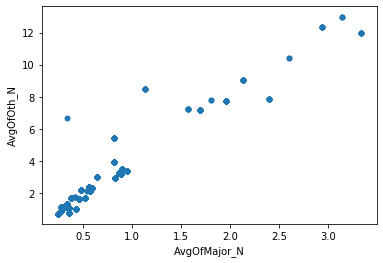

In [145]:
ssr_df1.plot.scatter('AvgOfMajor_N', 'AvgOfOth_N')

Scatter plot of two variables of dataset 2

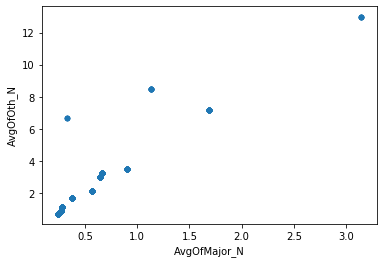

In [146]:
ssr_df2.plot.scatter('AvgOfMajor_N', 'AvgOfOth_N')

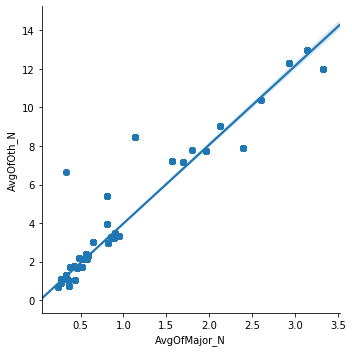

In [65]:
sns.lmplot(x='AvgOfMajor_N',y='AvgOfOth_N',data=ssr_df1,fit_reg=True)

Covariance of two variables of dataset 1

In [147]:
from numpy import cov
covariance = cov(ssr_df1['AvgOfMajor_N'], ssr_df1['AvgOfOth_N'])

In [148]:
covariance

array([[0.17358799, 0.70881688],
       [0.70881688, 3.10309053]])

Correlation of two variables of dataset 1

In [149]:
from scipy.stats import pearsonr
corr, _ = pearsonr(ssr_df1['AvgOfMajor_N'], ssr_df1['AvgOfOth_N'])

In [72]:
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.966


Pearson's correlation value suggests that there is a strong positive correlation between two variables

Plotting histograms of AvgofMajor_N 

Text(0, 0.5, 'Frequency')

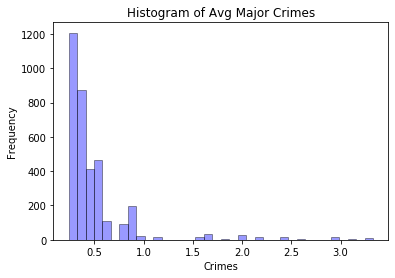

In [150]:
import matplotlib.pyplot as plt
sns.distplot(ssr_df1['AvgOfMajor_N'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of Avg Major Crimes')
plt.xlabel('Crimes')
plt.ylabel('Frequency')

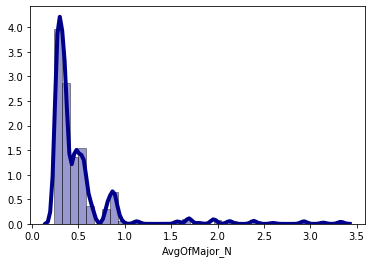

In [151]:
# Density Plot on the histogram
sns.distplot(ssr_df1['AvgOfMajor_N'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

Testing the null hypothesis 

In [156]:
ssr_df1['All_crimes'] = ssr_df1['Major_N'] + ssr_df1['Oth_N'] + ssr_df1['NoCrim_N'] + ssr_df1['Prop_N'] + ssr_df1['Vio_N']


In [157]:
ssr_df1.head()

,School_Year,Borough,Geographical_District_Code,Register,Schools,Schools_in_Building,Major_N,Oth_N,NoCrim_N,Prop_N,Vio_N,ENGroupA,RangeA,AvgOfMajor_N,AvgOfOth_N,AvgOfNoCrim_N,AvgOfProp_N,AvgOfVio_N,All_crimes
0,2013-14,K,15.0,1277.0,1,P.S. 001 The Bergen,0.0,2.0,1.0,1.0,0.0,7C,1251-1500,0.86,3.26,5.55,2.17,1.29,4.0
1,2013-14,K,17.0,876.0,3,Parkside Preparatory Academy | P.S. K141 |Exp...,1.0,5.0,2.0,2.0,4.0,5C,751-1000,0.52,1.71,2.49,1.16,0.75,14.0
2,2013-14,K,13.0,513.0,1,P.S. 003 The Bedford Village,2.0,0.0,0.0,2.0,0.0,4C,501-750,0.33,1.32,1.76,0.83,0.59,4.0
3,2013-14,K,16.0,312.0,1,P.S. 005 Dr. Ronald Mcnair,1.0,1.0,0.0,2.0,0.0,3C,251-500,0.35,1.06,1.09,0.73,0.50,4.0
4,2013-14,K,17.0,714.0,1,P.S. 006,0.0,1.0,2.0,0.0,0.0,4C,501-750,0.33,1.32,1.76,0.83,0.59,3.0


In [158]:
ssr_df1.groupby('School_Year').agg({'All_crimes':['min', 'max', 'mean']})



All_crimes                 
                   min    max      mean
School_Year                            
2013-14            0.0  126.0  8.102979
2014-15            0.0  128.0  7.950169
2015-16            0.0  130.0  7.711149

In [159]:
ssr_df2['All_crimes'] = ssr_df2['Major_N'] + ssr_df2['Oth_N'] + ssr_df2['NoCrim_N'] + ssr_df2['Prop_N'] + ssr_df2['Vio_N']



In [160]:
ssr_df2.head()

,School_Year,Borough,Geographical_District_Code,Register,Schools,Schools_in_Building,Major_N,Oth_N,NoCrim_N,Prop_N,Vio_N,ENGroupA,RangeA,AvgOfMajor_N,AvgOfOth_N,AvgOfNoCrim_N,AvgOfProp_N,AvgOfVio_N,All_crimes
0,2016 - 17,K,7,618.0,1,Brooklyn College Academy,0.0,0.0,1.0,0.0,0.0,4C,501-750,0.28,1.11,1.74,0.75,0.53,1.0
1,2016 - 17,Q,28,646.0,1,P.S. 082 Hammond,0.0,1.0,0.0,1.0,0.0,4C,501-750,0.28,1.11,1.74,0.75,0.53,2.0
2,2016 - 17,K,15,1334.0,1,P.S. 001 The Bergen,0.0,0.0,1.0,0.0,0.0,7C,1251-1500,0.64,3.02,5.77,1.72,1.54,1.0
3,2016 - 17,M,2,533.0,1,P.S. Q256,0.0,1.0,0.0,0.0,1.0,4C,501-750,0.28,1.11,1.74,0.75,0.53,2.0
4,2016 - 17,M,2,833.0,1,James Weldon Johnson,0.0,1.0,3.0,0.0,1.0,5C,751-1000,0.38,1.71,2.38,0.98,0.82,5.0


In [161]:
ssr_df2.groupby('School_Year').agg({'All_crimes':['min', 'max', 'mean']})



All_crimes                 
                   min    max      mean
School_Year                            
2016 - 17          0.0  114.0  7.485501

In [162]:
ttest_ind(ssr_df1['All_crimes'], ssr_df2['All_crimes'])

Ttest_indResult(statistic=1.0085891763517827, pvalue=0.31322309609765847)

P-value > 0.05 suggests null-hypothesis is true. 